In [1]:
import os
cwd = os.getcwd()
cwd

'/home/vin/cassandra-strict-slo/metrics_parser'

In [2]:
RESULTS_DIR = "../results"

In [3]:
import os
for file in os.listdir(RESULTS_DIR):
    if file.startswith("mixload_1000000ops") and file.endswith("Client1"):
        print(file)

mixload_1000000ops_0_Client1
mixload_1000000ops_10_Client1
mixload_1000000ops_1_Client1
mixload_1000000ops_20_Client1
mixload_1000000ops_30_Client1
mixload_1000000ops_40_Client1
mixload_1000000ops_5_Client1


In [4]:
mixload_files = list(map(lambda file: RESULTS_DIR + "/" + file,
                    filter(lambda file: 
                       file.startswith("mixload_1000000ops") and file.endswith("Client1"),
                       os.listdir(RESULTS_DIR)
                    )))
mixload_files

['../results/mixload_1000000ops_0_Client1',
 '../results/mixload_1000000ops_10_Client1',
 '../results/mixload_1000000ops_1_Client1',
 '../results/mixload_1000000ops_20_Client1',
 '../results/mixload_1000000ops_30_Client1',
 '../results/mixload_1000000ops_40_Client1',
 '../results/mixload_1000000ops_5_Client1']

In [5]:
def get_percentiles(filename):
    file = open(filename, "r")
    lines = list(map(lambda line: line.rstrip('\n'), file.readlines()))

    # Remove everything before "Starting test"
    def get_line_with_find(lines, regex):
        for index, line in enumerate(lines):
            if line.find(regex) != -1:
                return index
        return -1

    test_index = get_line_with_find(lines, 'Starting test.')

    full_test = lines[test_index + 1:]
    
    read_test_lines = list(
        filter(lambda line: line.find("[READ]") != -1, 
        filter(lambda line: line.find("Percentile") != -1, full_test)
    ))

    def get_tuple_from_line(line):
        parts = line.split(",")
        
        percentile_string = parts[1].strip()
        percentile = percentile_string.split("Percentile")[0].replace("th", "")
        percentile = float(percentile)
        
        latency_string = parts[2].strip()
        latency = int(latency_string)
        
        return percentile, latency
    
    return list(map(get_tuple_from_line, read_test_lines))
    
#     print(get_tuple_from_line(read_test_lines[0]))
#     for line in read_test_lines:
#         print(line)
    
    
get_percentiles(mixload_files[0])

[(10.0, 1423),
 (20.0, 1785),
 (30.0, 2173),
 (40.0, 2611),
 (50.0, 3083),
 (60.0, 3603),
 (70.0, 4151),
 (80.0, 4859),
 (90.0, 6215),
 (95.0, 8223),
 (96.0, 9039),
 (97.0, 10239),
 (98.0, 11991),
 (99.0, 15831),
 (99.1, 16479),
 (99.2, 17231),
 (99.3, 18063),
 (99.4, 19151),
 (99.5, 20335),
 (99.6, 21999),
 (99.7, 24255),
 (99.8, 28335),
 (99.85, 31519),
 (99.89, 35487),
 (99.9, 36735)]

In [6]:
def get_cdf_for_file(filename):
    threshold = filename.split("1000000ops_")[1].split("_")[0]
    return threshold, get_percentiles(filename)
    
get_cdf_for_file(mixload_files[0])

('0',
 [(10.0, 1423),
  (20.0, 1785),
  (30.0, 2173),
  (40.0, 2611),
  (50.0, 3083),
  (60.0, 3603),
  (70.0, 4151),
  (80.0, 4859),
  (90.0, 6215),
  (95.0, 8223),
  (96.0, 9039),
  (97.0, 10239),
  (98.0, 11991),
  (99.0, 15831),
  (99.1, 16479),
  (99.2, 17231),
  (99.3, 18063),
  (99.4, 19151),
  (99.5, 20335),
  (99.6, 21999),
  (99.7, 24255),
  (99.8, 28335),
  (99.85, 31519),
  (99.89, 35487),
  (99.9, 36735)])

In [68]:
cdfs = list(map(get_cdf_for_file, mixload_files))
cdfs

[('0',
  [(10.0, 1423),
   (20.0, 1785),
   (30.0, 2173),
   (40.0, 2611),
   (50.0, 3083),
   (60.0, 3603),
   (70.0, 4151),
   (80.0, 4859),
   (90.0, 6215),
   (95.0, 8223),
   (96.0, 9039),
   (97.0, 10239),
   (98.0, 11991),
   (99.0, 15831),
   (99.1, 16479),
   (99.2, 17231),
   (99.3, 18063),
   (99.4, 19151),
   (99.5, 20335),
   (99.6, 21999),
   (99.7, 24255),
   (99.8, 28335),
   (99.85, 31519),
   (99.89, 35487),
   (99.9, 36735)]),
 ('10',
  [(10.0, 1430),
   (20.0, 1817),
   (30.0, 2191),
   (40.0, 2605),
   (50.0, 3031),
   (60.0, 3483),
   (70.0, 3977),
   (80.0, 4683),
   (90.0, 6007),
   (95.0, 7843),
   (96.0, 8607),
   (97.0, 9583),
   (98.0, 11071),
   (99.0, 13823),
   (99.1, 14327),
   (99.2, 14919),
   (99.3, 15655),
   (99.4, 16495),
   (99.5, 17503),
   (99.6, 18639),
   (99.7, 20463),
   (99.8, 23311),
   (99.85, 25135),
   (99.89, 27599),
   (99.9, 28495)]),
 ('1',
  [(10.0, 1432),
   (20.0, 1827),
   (30.0, 2193),
   (40.0, 2541),
   (50.0, 2927),
   (60.0

In [8]:
from matplotlib import pyplot as plt

In [9]:
%matplotlib notebook

In [82]:
def get_cdfs_y(i):
    y = []
    lol = cdfs[i]
    for x in lol[1]:
        y.append(x[1])
    return y
i = 0
lol = cdfs[0]
x_axis = []
for x in lol[1]:
    x_axis.append(x[0])
print(x_axis)
y_0 = []
y_0 = get_cdfs_y(0)
print(y_0)
y_10 = get_cdfs_y(1)
print(y_10)
y_1 = get_cdfs_y(2)
print(y_1)
y_20 = get_cdfs_y(3)
print(y_20) 
y_30 = get_cdfs_y(4)
print(y_30)
y_40 = get_cdfs_y(5)
print(y_40)
y_5 = get_cdfs_y(6)
print(y_5)

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 96.0, 97.0, 98.0, 99.0, 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.85, 99.89, 99.9]
[1423, 1785, 2173, 2611, 3083, 3603, 4151, 4859, 6215, 8223, 9039, 10239, 11991, 15831, 16479, 17231, 18063, 19151, 20335, 21999, 24255, 28335, 31519, 35487, 36735]
[1430, 1817, 2191, 2605, 3031, 3483, 3977, 4683, 6007, 7843, 8607, 9583, 11071, 13823, 14327, 14919, 15655, 16495, 17503, 18639, 20463, 23311, 25135, 27599, 28495]
[1432, 1827, 2193, 2541, 2927, 3379, 3883, 4611, 5991, 7831, 8479, 9431, 10911, 13655, 14175, 14759, 15535, 16479, 17599, 19039, 20991, 23919, 26031, 28607, 29327]
[1350, 1667, 1999, 2373, 2819, 3343, 3887, 4519, 5735, 7503, 8223, 9247, 10583, 13023, 13471, 14039, 14719, 15559, 16607, 17903, 19679, 22431, 24079, 25999, 26655]
[1462, 1806, 2145, 2501, 2879, 3323, 3853, 4531, 5979, 8031, 8751, 9679, 11063, 13647, 14135, 14695, 15431, 16255, 17263, 18655, 20767, 23807, 25951, 28415, 29279]
[1472, 1824, 2155, 2477, 2

<IPython.core.display.Javascript object>


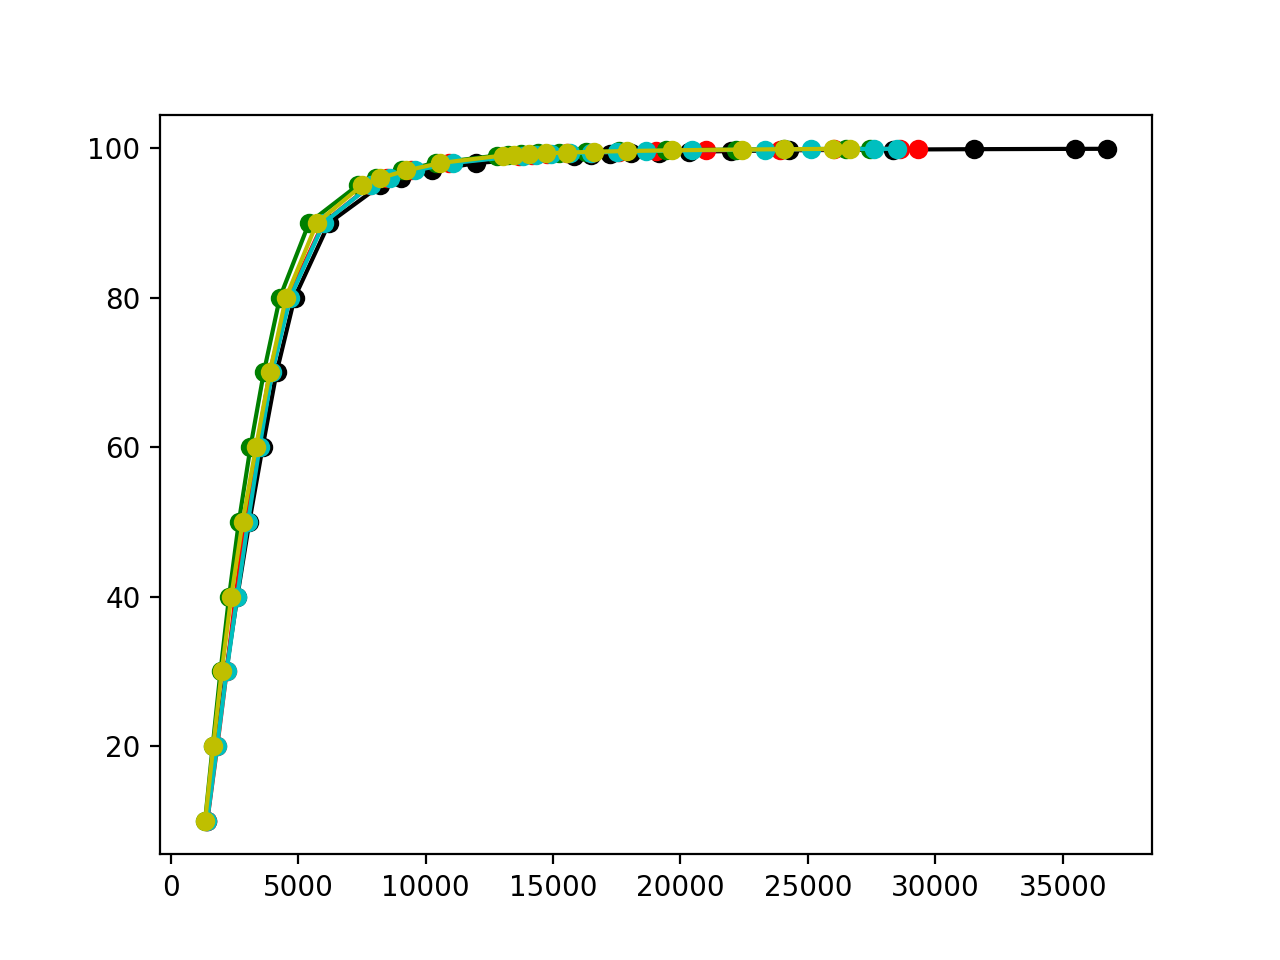

In [104]:
plt.plot(y_0, x_axis,'-ok')
plt.plot(y_1,x_axis,'-or')
plt.plot(y_5,x_axis,'-og')
plt.plot(y_10,x_axis,'-oc')
plt.plot(y_20,x_axis,'-oy')
#plt.plot(y_30,x_axis,'k')
#plt.plot(y_40,x_axis,'or')

plt.show()